# Data Analysis of The Online 3D Printings Store


### Importing and Cleaning Data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm


pd.set_option('display.max_columns', None)


In [64]:
df = pd.read_csv('datasets/sales_2018-09-23_2024-09-29.csv')
df.head()


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,b2b,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,company_name,company_location_name,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_margin,gross_profit,gross_sales,net_sales,returns,return_fees,shipping,taxes,total_cost,total_tips,units_per_transaction,average_order_value,duties,additional_fees
0,2018-09-23,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2018-09-24,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2018-09-25,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2018-09-26,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,2018-09-27,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [65]:
df.size

738375

In [66]:
df.isnull().sum().sort_values(ascending=False)

company_name               13425
company_location_name      13425
marketing_event_target     13423
marketing_event_type       13357
variant_sku                11761
product_type                7353
variant_title               6689
product_title               6227
referrer_host               4695
referrer_url                4695
billing_region              1831
shipping_city               1027
market_name                 1007
sale_kind                   1005
cancelled                   1005
order_name                  1005
referring_channel           1005
financial_status            1005
cost_tracked                1005
billing_country             1005
billing_city                1005
purchase_option             1005
api_client_title            1005
referring_platform          1005
adjustment                  1005
customer_type               1005
product_id                     0
order_id                       0
customer_id                    0
product_price                  0
day       

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13425 entries, 0 to 13424
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      13425 non-null  object 
 1   order_id                 13425 non-null  int64  
 2   billing_city             12420 non-null  object 
 3   customer_id              13425 non-null  int64  
 4   product_id               13425 non-null  int64  
 5   product_price            13425 non-null  float64
 6   product_title            7198 non-null   object 
 7   product_type             6072 non-null   object 
 8   variant_id               13425 non-null  int64  
 9   variant_sku              1664 non-null   object 
 10  variant_title            6736 non-null   object 
 11  api_client_title         12420 non-null  object 
 12  shipping_city            12398 non-null  object 
 13  market_name              12418 non-null  object 
 14  purchase_option       

In [68]:
empty_cols = np.concatenate(([col for col in df.columns if (df[col] == 0).all()], df.columns[df.isna().all()]))
df.loc[:, empty_cols].head()


,b2b,gross_margin,gross_profit,return_fees,total_cost,total_tips,duties,additional_fees,company_name,company_location_name
0,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,False,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [69]:
df.drop(empty_cols, axis=1, inplace=True)

df['order_id'] = df['order_id'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)
df['variant_id'] = df['variant_id'].astype(str)
df['day'] = pd.to_datetime(df['day'])
df.product_type = df.product_type.str.replace('mini', 'Mini')

df['year'] = df['day'].dt.year
df['month'] = df['day'].dt.month
df['day_of_month'] = df['day'].dt.day

In [70]:
df.sale_kind.value_counts()

sale_kind
order     12263
return      157
Name: count, dtype: int64

In [71]:
df = df[(df.sale_kind == 'order') & df.net_sales != 0]

In [72]:
df = df[df.product_id != '0']

In [73]:
df.describe().round(2)

,day,product_price,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month
count,7072,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00,7072.0,7072.0,7072.00,7072.00,7072.00,7072.00,7072.00,7072.00
mean,2021-11-04 14:36:59.457013504,132.40,116.54,-18.25,1.00,1.00,1.04,1.04,134.62,116.38,0.0,0.0,0.16,1.04,116.12,2021.36,6.28,15.34
min,2018-09-28 00:00:00,0.50,0.25,-9200.00,0.00,0.00,1.00,0.00,0.43,0.21,0.0,0.0,0.00,0.00,0.00,2018.00,1.00,1.00
25%,2021-01-31 00:00:00,49.00,49.00,-2.45,1.00,1.00,1.00,1.00,49.00,49.00,0.0,0.0,0.00,1.00,49.00,2021.00,3.00,7.00
50%,2021-05-04 00:00:00,55.00,55.00,0.00,1.00,1.00,1.00,1.00,59.00,55.00,0.0,0.0,0.00,1.00,54.84,2021.00,5.00,15.00
75%,2022-02-03 00:00:00,127.00,114.00,0.00,1.00,1.00,1.00,1.00,138.00,114.00,0.0,0.0,0.00,1.00,114.00,2022.00,11.00,23.00
max,2024-09-26 00:00:00,22000.00,18400.00,0.00,1.00,1.00,11.00,11.00,22000.00,18400.00,0.0,0.0,51.26,11.00,18400.00,2024.00,12.00,31.00
std,NaN,745.72,500.54,287.64,0.03,0.03,0.33,0.31,745.99,500.53,0.0,0.0,1.81,0.33,500.39,1.17,4.01,9.08


In [74]:
df.describe(include='object')


,order_id,billing_city,customer_id,product_id,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment
count,7072,7072,7072,7072,7072,5976,7072,1643,6632,7072,7067,7071,7072,7072,7072,7072,7072,7072,6616,7072,7072,7072,7072,4969,4969,7072,7072,1,40,7072
unique,5111,2184,3722,123,144,6,284,168,44,5,2269,2,1,2,1,5,5111,1,120,58,2,77,30,267,68,40,37,1,1,1
top,3051017765019,New York,5918842519782,5280927514779,Water Yourself,Mini,34575556771995,MCwateLB,Black,Online Store,New York,United States,One-time,No,No,paid,#2419,order,California,United States,First-time,2020-12,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,facebook_messenger,message,No
freq,11,75,55,602,602,3566,373,68,3940,6812,77,6058,7072,7044,7072,6946,11,7072,855,6100,5079,762,2033,902,1427,2167,2660,1,40,7072


In [106]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_histogram(x=df['day'], y=df['orders'], histfunc="sum")
fig.update_layout(
    title="Total Orders Over Time",
    xaxis_title="Day",
    yaxis_title="Total Orders",
    bargap=0.2,
    bargroupgap=0.1,
    width=1000,
    height=500
)
fig.show()

In [108]:
fig = go.Figure()
fig.add_histogram(x=df['day'], y=df['net_sales'], histfunc="sum")
fig.update_layout(
    title="Total Net Sales Over Time",
    xaxis_title="Day",
    yaxis_title="Total Net Sales",
    bargap=0.2,
    bargroupgap=0.1,
    width=1000,
    height=500
)
fig.show()

### Additional Features


In [77]:
df['unit_price'] = np.abs(df['product_price'] / df['net_quantity'])
df['discount_percentage'] = np.abs(df['discounts'] / df['product_price']) * 100
df['discount_rate'] = np.abs(df['discounts'] / df['gross_sales'])
df['price_discounted'] = df['product_price'] - df['discounts']
df['is_discounted'] = df['discount_percentage'] > 0


### Geographical Analysis


In [78]:
coords = pd.read_csv('city_coordinates.csv').drop_duplicates()
coords

,billing_city,latitude,longitude
0,Gilbert,33.352763,-111.789037
1,Taipa,22.157380,113.560103
2,White Marsh,39.383655,-76.451127
3,East Palatka,29.652377,-81.599589
4,Fayetteville,36.062584,-94.157433
...,...,...,...
7178,Mandeville,49.220641,1.011684
7179,תח אביב,32.096145,34.951496
7182,Far Rockaway,40.605382,-73.755133
7188,Glebe,-33.877778,151.186238


In [79]:

df = df.merge(coords, on='billing_city', how='left')
df.head()


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude
0,2018-09-28,613689163828,Gilbert,734368038964,6203234119,100.0,City Overlook,Gift Collection,19742441671,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,2018,9,28,100.0,0.000000,0.000000,100.0,False,33.352763,-111.789037
1,2018-10-02,616200765492,Taipa,736557793332,6203205511,100.0,Bird Cage,Gift Collection,20502905031,NaN,NaN,Online Store,Taipa,International,One-time,No,No,paid,#1136,order,NaN,Macao,First-time,2018-10,2018-10,https://www.jeanpierreweill.com/collections/gi...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,2018,10,2,100.0,0.000000,0.000000,100.0,False,22.157380,113.560103
2,2018-10-04,617671426100,White Marsh,739204300852,6306587911,120.0,Jazz Ensemble,Gift Collection,20133536839,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,10,4,120.0,0.000000,0.000000,120.0,False,39.383655,-76.451127
3,2018-11-11,643194716212,East Palatka,6421963796,6179810823,120.0,Moonlight Dance,Gift Collection,19682720775,NaN,NaN,Online Store,East Palatka,United States,One-time,No,No,paid,#1138,order,Florida,United States,First-time,2018-11,2018-10,https://www.bing.com/search,www.bing.com,bing,microsoft,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,11,11,120.0,0.000000,0.000000,120.0,False,29.652377,-81.599589
4,2018-11-13,644933124148,Fayetteville,865021722676,6203242823,120.0,Men Raining,Gift Collection,19742477767,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,2018,11,13,120.0,30.833333,0.308333,157.0,True,36.062584,-94.157433


In [109]:
import plotly.express as px

df_grouped = df.groupby('billing_city').agg({
    'latitude': 'first',
    'longitude': 'first',
    'net_sales': 'sum',
    'order_id': 'count'
}).reset_index()

df_with_coords = df_grouped.dropna(subset=['latitude', 'longitude', 'net_sales', 'order_id'])

fig = px.scatter_mapbox(df_with_coords, 
                        lat="latitude", 
                        lon="longitude", 
                        size="net_sales",
                        hover_name="billing_city",
                        hover_data=["net_sales", "order_id"],
                        color="order_id",
                        size_max=50,
                        zoom=3,
                        mapbox_style="open-street-map")

fig.update_layout(
    title="Total Net Sales and Order Count by City",
    mapbox=dict(
        center=dict(lat=df_with_coords['latitude'].mean(), lon=df_with_coords['longitude'].mean()),
    ),
    height=700,
    width=1000
)

fig.show()


In [110]:
billing_country_counts = df['billing_country'].value_counts()
top_4_countries = billing_country_counts.head(4)
others_count = billing_country_counts[4:].sum()
top_4_countries['Others'] = others_count
top_4_countries = top_4_countries.sort_values(ascending=False)

discrete_colors = px.colors.qualitative.Pastel

fig = px.pie(
    values=top_4_countries.values,
    names=top_4_countries.index,
    title='Distribution of Billing Countries',
    color_discrete_sequence=discrete_colors,  # Use the discrete color range
    height=500
)

fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=15)

fig.show()

In [82]:
from plotly.subplots import make_subplots

country_stats = df.groupby('billing_country').agg({
    'net_sales': 'mean',
    'order_id': 'count'
}).reset_index()

top_10_countries = country_stats[country_stats.order_id > 5].sort_values('net_sales', ascending=False).head(10)

median_net_sales = country_stats['net_sales'].median()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=top_10_countries['billing_country'], y=top_10_countries['net_sales'], name="Avg Net Sales", marker=dict(color='lightblue')),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=top_10_countries['billing_country'], y=top_10_countries['order_id'], name="Order Count", mode='lines+markers', line=dict(color='coral'), marker=dict(color='red')),
    secondary_y=True,
)

fig.add_hline(y=median_net_sales, line_dash="dash", line_color="blue")

fig.add_annotation(
    x=0.9,
    y=median_net_sales,
    xref="paper",
    yref="y",
    text=f"Median Net Sales: ${median_net_sales:.2f}",
    showarrow=False,
    font=dict(color="blue"),
    bgcolor="white",
    bordercolor="blue",
    borderwidth=1
)

fig.update_layout(
    title_text="Top 10 Countries by Average Net Sales and Order Count",
    xaxis_title="Country",
    barmode='group',
    height=600,
    width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue'
)

fig.update_yaxes(title_text="Average Net Sales", secondary_y=False)
fig.update_yaxes(title_text="Order Count", secondary_y=True)

fig.show()


In [83]:
# cities_stats = df.groupby(['billing_city', 'billing_country'])['net_sales'].agg(['sum', 'count', 'mean', 'median']).reset_index().sort_values('sum', ascending=False)
# cities_stats.columns = ['billing_city', 'billing_country', 'total_net_sales', 'order_count', 'average_net_sales', 'median_net_sales']



### USA

In [84]:
usa = df[df['billing_country'] == 'United States']
usa.head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude
0,2018-09-28,613689163828,Gilbert,734368038964,6203234119,100.0,City Overlook,Gift Collection,19742441671,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,2018,9,28,100.0,0.000000,0.000000,100.0,False,33.352763,-111.789037
2,2018-10-04,617671426100,White Marsh,739204300852,6306587911,120.0,Jazz Ensemble,Gift Collection,20133536839,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,10,4,120.0,0.000000,0.000000,120.0,False,39.383655,-76.451127
3,2018-11-11,643194716212,East Palatka,6421963796,6179810823,120.0,Moonlight Dance,Gift Collection,19682720775,NaN,NaN,Online Store,East Palatka,United States,One-time,No,No,paid,#1138,order,Florida,United States,First-time,2018-11,2018-10,https://www.bing.com/search,www.bing.com,bing,microsoft,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,11,11,120.0,0.000000,0.000000,120.0,False,29.652377,-81.599589
4,2018-11-13,644933124148,Fayetteville,865021722676,6203242823,120.0,Men Raining,Gift Collection,19742477767,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,2018,11,13,120.0,30.833333,0.308333,157.0,True,36.062584,-94.157433
5,2018-11-13,644933124148,Fayetteville,865021722676,6203198151,120.0,Paris Morning,Gift Collection,19898987783,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,2018,11,13,120.0,30.833333,0.308333,157.0,True,36.062584,-94.157433


In [85]:
region_stats = usa.groupby('billing_region').agg({
    'net_sales': 'mean',
    'order_id': 'count'
}).reset_index()

top_10_regions = region_stats[region_stats.order_id > 5].sort_values('net_sales', ascending=False).head(10)

median_net_sales = region_stats['net_sales'].median()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=top_10_regions['billing_region'], y=top_10_regions['net_sales'], name="Avg Net Sales", marker=dict(color='lightblue')),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=top_10_regions['billing_region'], y=top_10_regions['order_id'], name="Order Count", mode='lines+markers', line=dict(color='coral'), marker=dict(color='red')),
    secondary_y=True,
)

fig.add_hline(y=median_net_sales, line_dash="dash", line_color="blue")

fig.add_annotation(
    x=0.9,
    y=median_net_sales,
    xref="paper",
    yref="y",
    text=f"Median Net Sales: ${median_net_sales:.2f}",
    showarrow=False,
    font=dict(color="blue"),
    bgcolor="white",
    bordercolor="blue",
    borderwidth=1
)

fig.update_layout(
    title_text="Top 10 US Regions by Average Net Sales and Order Count",
    xaxis_title="Region",
    barmode='group',
    height=600,
    width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue'
)

fig.update_yaxes(title_text="Average Net Sales", secondary_y=False)
fig.update_yaxes(title_text="Order Count", secondary_y=True)

fig.show()


### Customers

In [86]:
df[df.net_sales == 0].head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude


In [87]:
import plotly.express as px

fig = px.box(df, x='customer_type', y='net_sales', 
             title='Net Sales Distribution by Customer Type (Log Scale)',
             labels={'customer_type': 'Customer Type', 'net_sales': 'Net Sales (Log Scale)'},
             height=600, width=1000,
             points=False,
             log_y=True)  # Add log scale for y-axis

fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    yaxis_type="log"  # Ensure y-axis is in log scale
)

# Add a note about log scale
fig.add_annotation(
    x=1, y=1.05, xref="paper", yref="paper",
    text="Note: Y-axis is in log scale",
    showarrow=False,
    font=dict(size=12),
    align="right"
)

fig.show()

In [88]:
import scipy.stats as stats

first_time = df[df['customer_type'] == 'First-time']['net_sales']
returning = df[df['customer_type'] == 'Returning']['net_sales']

statistic, p_value = stats.ttest_ind(first_time, returning, equal_var=False)

print("Two-sample t-test results:")
print(f"Statistic: {statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("\nThe difference in net sales between First-time and Returning customers is statistically significant.")
else:
    print("\nThere is no statistically significant difference in net sales between First-time and Returning customers.")

print(f"\nMean net sales for First-time customers: ${first_time.mean():.2f}")
print(f"Mean net sales for Returning customers: ${returning.mean():.2f}")


Two-sample t-test results:
Statistic: -2.306672951440411
p-value: 0.021156655009261414

The difference in net sales between First-time and Returning customers is statistically significant.

Mean net sales for First-time customers: $105.30
Mean net sales for Returning customers: $144.60


In [89]:
purchases_by_client = df.groupby('customer_id').size().sort_values(ascending=False).reset_index(name='purchase_count')
purchases_by_client = purchases_by_client[purchases_by_client.purchase_count < 10]

# Plot the distribution using plotly
fig = px.histogram(purchases_by_client, x='purchase_count', nbins=int(purchases_by_client['purchase_count'].max()),
                   title='Distribution of Number of Purchases by Same Client')

fig.update_layout(
    xaxis_title='Number of Purchases',
    yaxis_title='Frequency',
    width=1000,
    height=600,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue'
)

fig.show()

In [90]:
# Calculate net sales per customer
customer_sales = df.groupby('customer_id')['net_sales'] \
    .sum() \
    .reset_index() \
    .sort_values(by='net_sales', ascending=False)

total_sales = customer_sales['net_sales'].sum()

# Take top 20% of customers
customer_sales_20 = customer_sales.head(int(len(customer_sales) * 0.2)).copy()
# Calculate cumulative sales for visualization
customer_sales_20.loc[:, 'cumsales'] = customer_sales_20['net_sales'].cumsum()
customer_sales_20.loc[:, 'cumsales_perc'] = customer_sales_20['cumsales'] / total_sales * 100

fig = px.bar(customer_sales_20.reset_index(),  
             x='customer_id', y='cumsales_perc',
             labels={'cumsales_perc': 'Cumulative Sales Percentage'},
             title='Pareto Principle (Net Sales)',
             height=600, width=800)

# Let's add a horizontal line so we can see if 
# cumulative sales of top 20% of customers reaches the 80% mark
fig.add_hline(y=80, line_dash="dash", line_color="red", annotation_text="80% threshold", 
              annotation_position="bottom left")

fig.update_xaxes(showticklabels=False, title='')

fig.show()

print(f'The top 20% of customers contribute to {customer_sales_20.iloc[-1]["cumsales_perc"]:.2f}% of the total net sales.')

The top 20% of customers contribute to 65.43% of the total net sales.


In [114]:
df['day'] = pd.to_datetime(df['day'])

monthly_sales_by_customer_type = df.groupby([df['day'].dt.to_period('M'), 'customer_type'])['net_sales'].sum().unstack()

monthly_sales_by_customer_type = monthly_sales_by_customer_type.reset_index()
monthly_sales_by_customer_type['day'] = monthly_sales_by_customer_type['day'].dt.to_timestamp()

fig = px.line(monthly_sales_by_customer_type, x='day', y=['First-time', 'Returning'],
              title='Monthly Net Sales by Customer Type',
              labels={'day': 'Month', 'value': 'Net Sales', 'variable': 'Customer Type'},
              line_shape='linear')

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Net Sales',
    legend_title='Customer Type',
    hovermode='x unified',
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    height=500,
    width=1000
)

fig.show()


### Products

In [92]:
product_type_net_sales = df.groupby('product_type')['net_sales'].sum().sort_values(ascending=False)

color_palette = px.colors.qualitative.Plotly
color_map = {product_type: color_palette[i % len(color_palette)] for i, product_type in enumerate(product_type_net_sales.index)}

fig = px.pie(product_type_net_sales, 
             values='net_sales',
             names=product_type_net_sales.index,
             title='Total Net Sales by Product Type',
             color=product_type_net_sales.index,
             color_discrete_map=color_map)

fig.update_layout(
    showlegend=True,
    legend_title='Product Type',
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    width=800,
    height=600,
    font=dict(size=15)
)

fig.update_traces(textinfo='percent+label')

In [93]:
product_type_net_sales = df.groupby('product_type')['net_sales'].size().sort_values(ascending=False)

fig = px.pie(product_type_net_sales, 
             values=product_type_net_sales.values,
             names=product_type_net_sales.index,
             title='Number of Sales by Product Type',
             color=product_type_net_sales.index,
             color_discrete_map=color_map)

fig.update_layout(
    showlegend=True,
    legend_title='Product Type',
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    width=800,
    height=600,
    font=dict(size=15)
)

fig.update_traces(textinfo='percent+label')

In [115]:
mini_data = df[df.product_type == 'Mini']

mini_md = mini_data.groupby(mini_data['day'].dt.to_period('M')).agg({
    'price_discounted': 'mean',
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

mini_md['day'] = mini_md['day'].dt.to_timestamp()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=mini_md['day'], y=mini_md['price_discounted'], name="Mean Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=mini_md['day'], y=mini_md['net_sales'], name="Net Sales"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Month")
fig.update_yaxes(title_text="Mean Product Price", secondary_y=False)
fig.update_yaxes(title_text="Net Sales", secondary_y=True)

fig.update_layout(
    title_text="Mean Product Price vs Net Sales Over Time for Mini Product Type",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1), 
    hovermode='x unified', height=500, width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

fig.show()

In [116]:
gift_collection_data = df[df.product_type == 'Gift Collection']

gc_md = gift_collection_data.groupby(gift_collection_data['day'].dt.to_period('M')).agg({
    'price_discounted': 'mean',
    'product_price': 'mean',
    'net_sales': 'sum'
}).reset_index()

gc_md['day'] = gc_md['day'].dt.to_timestamp()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=gc_md['day'], y=gc_md['price_discounted'], name="Mean Product Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=gc_md['day'], y=gc_md['net_sales'], name="Net Sales"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Month")

fig.update_yaxes(title_text="Mean Product Price", secondary_y=False)
fig.update_yaxes(title_text="Net Sales", secondary_y=True)

fig.update_layout(
    title_text="Mean Product Price vs Net Sales Over Time for Gift Collection Product Type",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    hovermode='x unified', height=500, width=1000,
    plot_bgcolor='aliceblue',
    paper_bgcolor='aliceblue',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

fig.show()

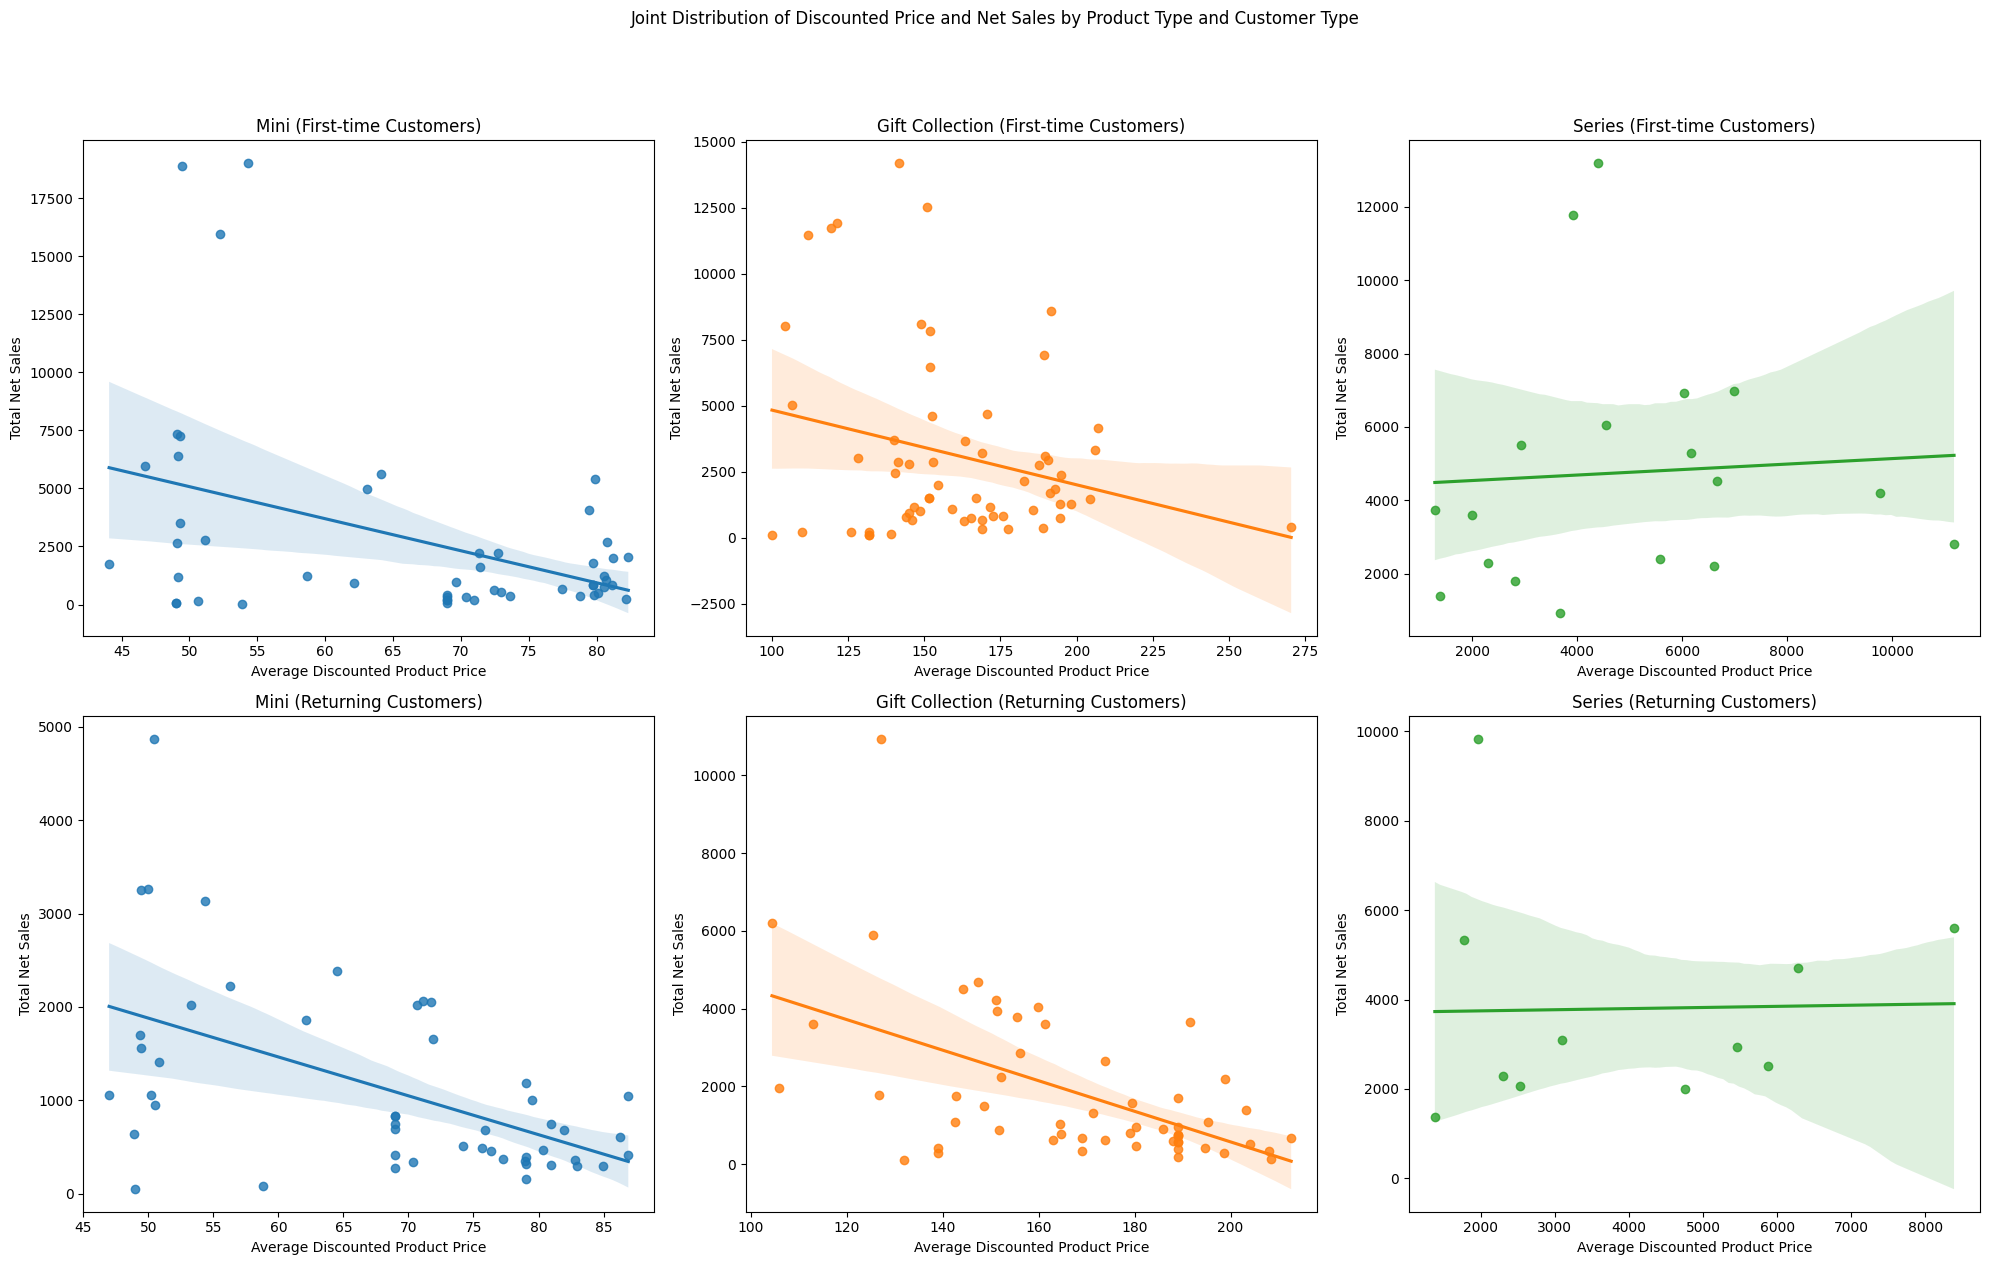

In [96]:
product_types = ['Mini', 'Gift Collection', 'Series']
customer_types = ['First-time', 'Returning']

filtered_df = df[df.product_type.isin(product_types) & ~((df.product_type == 'Gift Collection') & (df.product_price > 500))]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle("Joint Distribution of Discounted Price and Net Sales by Product Type and Customer Type", y=1.05)

for j, customer_type in enumerate(customer_types):
    customer_df = filtered_df[filtered_df.customer_type == customer_type]
    
    monthly_data = customer_df.groupby([customer_df['day'].dt.to_period('M'), 'product_type']).agg({
        'price_discounted': 'mean',
        'product_price': 'mean',
        'net_sales': 'sum'
    }).reset_index()

    monthly_data['day'] = monthly_data['day'].dt.to_timestamp()

    for i, product_type in enumerate(product_types):
        data = monthly_data[(monthly_data['product_type'] == product_type)
                            ]
        sns.regplot(
            data=data,
            x="price_discounted",
            y="net_sales",
            scatter=True,
            fit_reg=True,
            color=sns.color_palette()[i],
            ax=axes[j, i]
        )
        
        axes[j, i].set_title(f"{product_type} ({customer_type} Customers)")
        axes[j, i].set_xlabel("Average Discounted Product Price")
        axes[j, i].set_ylabel("Total Net Sales")

plt.tight_layout()
plt.show()

Pearson's correlation between monthly net sales and average discounted price:
      Product Type Customer Type  Correlation   P-value  Significant
0             Mini    First-time    -0.408267  0.002938         True
1             Mini     Returning    -0.533466  0.000079         True
2  Gift Collection    First-time    -0.250167  0.047991         True
3  Gift Collection     Returning    -0.539779  0.000021         True
4           Series    First-time     0.061136  0.809570        False
5           Series     Returning     0.023577  0.945143        False


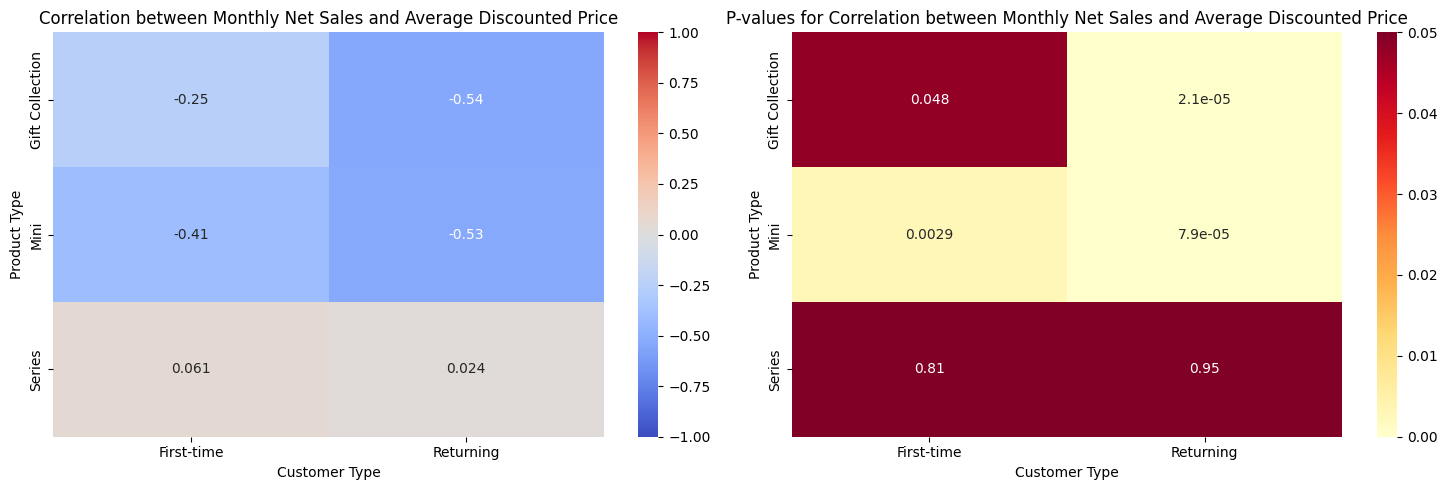

In [97]:
from scipy import stats

monthly_data = filtered_df.groupby([filtered_df['day'].dt.to_period('M'), 'product_type', 'customer_type']).agg({
    'net_sales': 'sum',
    'price_discounted': 'mean'
}).reset_index()

correlations = []

for product_type in product_types:
    for customer_type in customer_types:
        subset = monthly_data[(monthly_data['product_type'] == product_type) & 
                              (monthly_data['customer_type'] == customer_type)]
        
        correlation, p_value = stats.pearsonr(subset['net_sales'], subset['price_discounted'])
        
        correlations.append({
            'Product Type': product_type,
            'Customer Type': customer_type,
            'Correlation': correlation,
            'P-value': p_value
        })

correlation_df = pd.DataFrame(correlations)
correlation_df['Significant'] = correlation_df['P-value'] < 0.05

print("Pearson's correlation between monthly net sales and average discounted price:")
print(correlation_df)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

correlation_pivot = correlation_df.pivot(index='Product Type', columns='Customer Type', values='Correlation')
sns.heatmap(correlation_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax1)
ax1.set_title("Correlation between Monthly Net Sales and Average Discounted Price")

p_value_pivot = correlation_df.pivot(index='Product Type', columns='Customer Type', values='P-value')
sns.heatmap(p_value_pivot, annot=True, cmap='YlOrRd', vmin=0, vmax=0.05, ax=ax2)
ax2.set_title("P-values for Correlation between Monthly Net Sales and Average Discounted Price")

plt.tight_layout()
plt.show()


### Referring Channels


In [98]:
# Create a discrete color map for channel names
color_palette = px.colors.qualitative.Plotly
channel_names = df['referring_channel'].unique()
color_map = {channel: color_palette[i % len(color_palette)] for i, channel in enumerate(channel_names)}


In [99]:
channel_counts_10 = df.referring_channel.value_counts().head(10)

fig = px.bar(channel_counts_10, 
             title='Top 10 Referring Channels',
             labels={'index': 'Referring Channel', 'value': 'Count'},
             text_auto=True, 
             color=channel_counts_10.index,
             color_discrete_map=color_map)

fig.update_layout(
    xaxis_title='Referring Channel',
    yaxis_title='Count',
    legend_title_text='Referring Channel'
)

fig.show()

In [100]:
newc = df[df.customer_type == 'First-time']
channel_counts_10 = newc.referring_channel.value_counts().head(10)

fig = px.bar(channel_counts_10, 
             title='Top 10 Referring Channels',
             labels={'index': 'Referring Channel', 'value': 'Count'},
             text_auto=True, 
             color=channel_counts_10.index,
             color_discrete_map=color_map)

fig.update_layout(
    xaxis_title='Referring Channel',
    yaxis_title='Count',
    legend_title_text='Referring Channel'
)

fig.show()

In [101]:
ret = df[df.customer_type == 'Returning']
channel_counts_10 = ret.referring_channel.value_counts().head(10)

fig = px.bar(channel_counts_10, 
             title='Top 10 Referring Channels',
             labels={'index': 'Referring Channel', 'value': 'Count'},
             text_auto=True, 
             color=channel_counts_10.index,
             color_discrete_map=color_map)

fig.update_layout(
    xaxis_title='Referring Channel',
    yaxis_title='Count',
    legend_title_text='Referring Channel'
)

fig.show()

In [102]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ref_sc = newc['referring_channel'].value_counts()
ref_sc = ref_sc[ref_sc > 10]

avg_net_sales_by_referral = newc[newc.referring_channel.isin(ref_sc.index)].groupby('referring_channel')['net_sales'].mean().sort_values(ascending=False).head(10)

ref_sc = ref_sc.reindex(avg_net_sales_by_referral.index)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=avg_net_sales_by_referral.index, y=avg_net_sales_by_referral.values, name='Average Net Sales', marker_color='lightblue'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=ref_sc.index, y=ref_sc.values, mode='lines+markers', name='Sales Count', line=dict(color='coral'), marker=dict(color='red')),
    secondary_y=True,
)

overall_mean = newc.net_sales.mean()

fig.add_hline(y=overall_mean, line_dash="dash", line_color="red", annotation_text=f"Mean: {overall_mean:.2f}", annotation_position="top right")

fig.update_layout(
    title='Average Net Sales by Referral Channel',
    xaxis_title='Referring Channel',
    yaxis_title='Average Net Sales',
    yaxis2_title='Sales Count',
    legend_title='Metrics',
    barmode='group'
)

fig.show()

In [103]:
import scipy.stats as stats

mean_net_sales = newc['net_sales'].mean()

direct_sales = newc[newc['referring_channel'] == 'direct']['net_sales']
other_sales = newc[newc['referring_channel'] != 'direct']['net_sales']

t_statistic, p_value = stats.ttest_ind(direct_sales, other_sales)

alpha = 0.05
is_significant = p_value < alpha

print(f"Mean net sales across all channels: ${mean_net_sales:.2f}")
print(f"Mean net sales for 'direct' channel: ${direct_sales.mean():.2f}")
print(f"Mean net sales for other channels: ${other_sales.mean():.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"The difference in net sales between 'direct' channel and other channels is {'statistically significant' if is_significant else 'not statistically significant'}.")
print(f"We {'can' if is_significant else 'cannot'} reject the null hypothesis that the means are equal.")


Mean net sales across all channels: $105.30
Mean net sales for 'direct' channel: $153.51
Mean net sales for other channels: $86.32
T-statistic: 5.7072
P-value: 0.0000
The difference in net sales between 'direct' channel and other channels is statistically significant.
We can reject the null hypothesis that the means are equal.
